# Matching the chemicals found on the FEMA and JECFA websites with rdkit chemical representations

In [2]:
import os.path as path
import pickle

# Load merged FEMA-JECFA database
BASE_DATA_PATH = path.join(path.expanduser('~'),
                           'Dropbox',
                           'bymt',
                           'data_dumps',
                           'chem_project')

merged_chemicals_path = path.join(BASE_DATA_PATH, 'fema_jecfa_merge', 'merged_chemicals.pkl')
with open(merged_chemicals_path, 'rb') as f:
    merged_chemicals = pickle.load(f)

In [3]:
from chemspipy import ChemSpider
cs = ChemSpider('0201ba66-585d-4135-9e6b-d28ba4724fcf')
from rdkit import Chem
from rdkit.Chem import Descriptors
from inspect import getmembers, isfunction

In [15]:
def same_chemical(results, mw):
    '''
    returns an rdkit chemical object if a the chemicals in a chemspipy result list have:
    -the same molecular weight, and
    -the same smiles representation
    returns None otherwise
    '''
    if results.count == 0:
        return None, None

    smiles = []
    mws = []

    if results.count >= 1:
        for chemical in results:
            try:
                test1_mw = chemical.molecular_weight
                test1_mw = round(test1_mw, 1)
                smiles_base = chemical.smiles
                chem_base = Chem.MolFromSmiles(smiles_base)
                test2_mw = Chem.Descriptors.MolWt(chem_base)
                test2_mw = round(test2_mw, 1)
#                 print('Test1: {}, Test2: {}' .format(test1_mw, test2_mw))                
                if (mw == test1_mw and
                   test1_mw == test2_mw):
#                     print('Matched MWs')
                    return chem_base, chemical.csid                
                # If no mw is known determines if the results are internally consistent
                # If they are, it returns one of them
                if not mw:
                    smiles_temp = Chem.MolToSmiles(chem_base)
                    smiles.append(smiles_temp)
                    mw_temp = Chem.Descriptors.MolWt(chem_base)
                    mws.append(mw_temp)
                    if (len(set(smiles)) == 1 and
                    len(set(mws)) == 1):
#                         print('All results internally consistent, but no mw match')
                        return chem_base, chemical.csid           
            except:
                print(' MW EX', end=' ')
                continue
        else:
            return None, None    
    else:
        return None, None

def chem_search(dicto):
    '''
    returns an rdkit molecule and its chemspider id 
    after searching the chemspider database based on the items
    in the priority list.
    '''
    priority_list = ['fema', 'jecfa', 'cas', 'name']
    
    for string in priority_list:
        try:
            val = dicto.get(string)
            val = str(val)
        except AttributeError:
            continue
            
        if val :
            search_string = string + ' ' + val
#             print('searching for: {}' .format(search_string))
            results = cs.search(search_string)
            try:
                mw = dicto.get('molecular weight')
                mw = round(mw, 1)
            except TypeError:
                mw = None                
#             print('stopped searching')
#             print('real MW: {}' .format(mw))
            rd, csid = same_chemical(results, mw)
            if rd:
                return rd, csid
            else:
                continue
    return None, None

In [12]:
from copy import deepcopy

def rdkit_pairer(dicto_list):
    new_list = deepcopy(dicto_list)
    for dicto in new_list:
        rd, csid = chem_search(dicto)
        if rd:
            dicto['rdkit mol'] = rd
            dicto['csid'] = csid
        else:
            print(' {} failed' .format(dicto['name']), end=' ')
        print('.', end='')
    return new_list

In [14]:
rdkit_list = rdkit_pairer(merged_chemicals)

Test1: 222.4, Test2: 222.4
.Test1: 166.3, Test2: 166.3
.

KeyboardInterrupt: 

In [22]:
for dicto in test:
    rd = dicto['rdkit mol']
    d.MolToMPL(rd, size=(120,120))

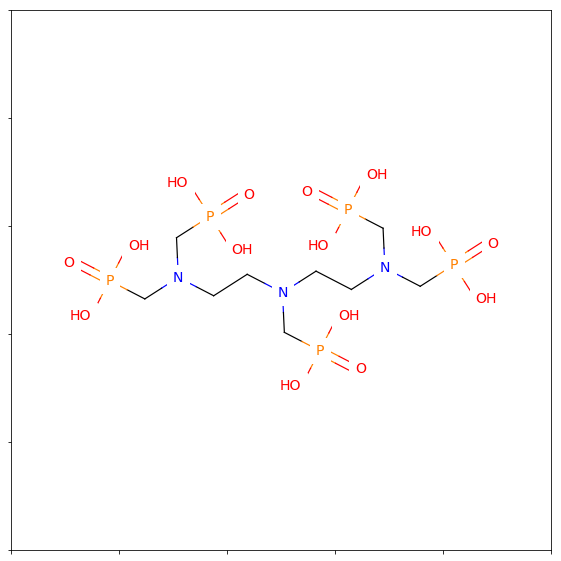

In [28]:
rd = test[9]['rdkit mol']
d.MolToMPL(rd)